# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [10]:
import pandas as pd

In [11]:
!wget -O pima-indians-diabetes.csv https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

--2018-11-19 10:57:31--  https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4340 (4.2K) [text/html]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]   4.24K  --.-KB/s    in 0s      

2018-11-19 10:57:31 (27.1 MB/s) - ‘pima-indians-diabetes.csv’ saved [4340/4340]



In [13]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [14]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [15]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data


In [16]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [17]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max() - x.min()))

In [18]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [19]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [20]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [21]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [22]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

### Converting Continuous to Categorical

In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

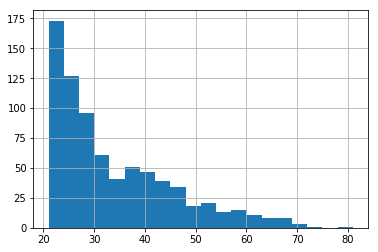

In [25]:
diabetes['Age'].hist(bins=20)

In [27]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

### Putting them together

In [28]:
feat_cols = [num_preg,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [29]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [31]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [32]:
x_data = diabetes.drop('Class',axis=1)

In [33]:
labels = diabetes['Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.2,random_state=1)

### Input Function


In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model


In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpo55l437j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a34209f28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
model.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpo55l437j/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 79.0763
INFO:tensorflow:loss = 5.724201, step = 101 (1.267 sec)
INFO:tensorflow:global_step/sec: 170.634
INFO:tensorflow:loss = 6.1878643, step = 201 (0.595 sec)
INFO:tensorflow:global_step/sec: 127.397
INFO:tensorflow:loss = 4.2630653, step = 301 (0.781 sec)
INFO:tensorflow:global_step/sec: 136.241
INFO:tensorflow:loss = 2.8915575, step = 401 (0.733 sec)
INFO:tensorflow:global_step/sec: 128.803
INFO:tensorflow:loss = 4.8531704, step = 501 (0.778 sec)
INFO:tensorflow:global_step/sec: 136.665
INFO:tensorflow:loss = 5.1569877, step = 601 (0.733 sec)
INFO:tensorflow

## Evaluation

In [39]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [40]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-17:12:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpo55l437j/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-19-17:12:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64285713, auc = 0.82525253, auc_precision_recall = 0.7408327, average_loss = 0.5078317, global_step = 1000, label/mean = 0.35714287, loss = 4.8878803, precision = 0.74358976, prediction/mean = 0.36001512, recall = 0.5272727
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpo55l437j/model.ckpt-1000


In [41]:
results

{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64285713,
 'auc': 0.82525253,
 'auc_precision_recall': 0.7408327,
 'average_loss': 0.5078317,
 'global_step': 1000,
 'label/mean': 0.35714287,
 'loss': 4.8878803,
 'precision': 0.74358976,
 'prediction/mean': 0.36001512,
 'recall': 0.5272727}

## Predictions

In [42]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [43]:
predictions = model.predict(pred_input_func)

In [44]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpo55l437j/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.64627224], dtype=float32),
  'logits': array([0.60269326], dtype=float32),
  'probabilities': array([0.35372776, 0.64627224], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.20641351], dtype=float32),
  'logits': array([-1.346681], dtype=float32),
  'probabilities': array([0.79358643, 0.20641352], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.16589661], dtype=float32),
  'logits': array([-1.6149926], dtype=float32),
  'probabilities': array([0.8341034 , 0.16589661], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.27649724], dtype=float32),
  'logits': array([-0.9619035], dtype=float32),
  'probabilities': array([0.72350276, 0.27649724], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=o

# DNN Classifier

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmp0ucc5ad6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3771de48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

### Solution is embedded group column since feature columns must be a dense column

In [47]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [48]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [49]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [50]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpnkq83x91', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a36e03d68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpnkq83x91/model.ckpt.
INFO:tensorflow:loss = 7.1481934, step = 1
INFO:tensorflow:global_step/sec: 109.518
INFO:tensorflow:loss = 7.6932726, step = 101 (0.915 sec)
INFO:tensorflow:global_step/sec: 189.097
INFO:tensorflow:loss = 4.4006376, step = 201 (0.529 sec)
INFO:tensorflow:global_step/sec: 177.469
INFO:tensorflow:loss = 6.1403694, step = 301 (0.563 sec)
INFO:tensorflow:global_step/sec: 206.119
INFO:tensorflow:loss = 7.191107, step = 401 (0.491 sec)
INFO:tensorflow:global_step/sec: 210.403
INFO:tensorflow:loss = 6.1681514, step = 501 (0.469 sec)
INFO:tensorflow:global_step/sec: 188.7
INFO:tensorflow:loss = 7.1580625, step = 601 (0.533 sec)
INFO:tensorflow:

In [52]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [53]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-17:19:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpnkq83x91/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-19-17:19:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7922078, accuracy_baseline = 0.64285713, auc = 0.850505, auc_precision_recall = 0.7842418, average_loss = 0.4561874, global_step = 1000, label/mean = 0.35714287, loss = 4.390804, precision = 0.7446808, prediction/mean = 0.36674577, recall = 0.6363636
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/sg/0yd_0m2s28l4yzc10h42qff80000gn/T/tmpnkq83x91/model.ckpt-1000


{'accuracy': 0.7922078,
 'accuracy_baseline': 0.64285713,
 'auc': 0.850505,
 'auc_precision_recall': 0.7842418,
 'average_loss': 0.4561874,
 'global_step': 1000,
 'label/mean': 0.35714287,
 'loss': 4.390804,
 'precision': 0.7446808,
 'prediction/mean': 0.36674577,
 'recall': 0.6363636}